In [38]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [39]:
# Create input variables (Tipsiness level and Alcohol content)
tipsiness = ctrl.Antecedent(np.arange(0, 101, 1), 'tipsiness')
alcohol_content = ctrl.Antecedent(np.arange(0, 101, 1), 'alcohol_content')

In [40]:
# Create output variable (Number of glasses)
num_of_glasses = ctrl.Consequent(np.arange(0, 21, 1), 'num_of_glasses')

In [41]:
# Create membership functions for Tipsiness level
tipsiness['low'] = fuzz.trimf(tipsiness.universe, [0, 0, 40])
tipsiness['moderate'] = fuzz.trimf(tipsiness.universe, [30, 40, 50])
tipsiness['high'] = fuzz.trapmf(tipsiness.universe, [40, 60, 100, 100])

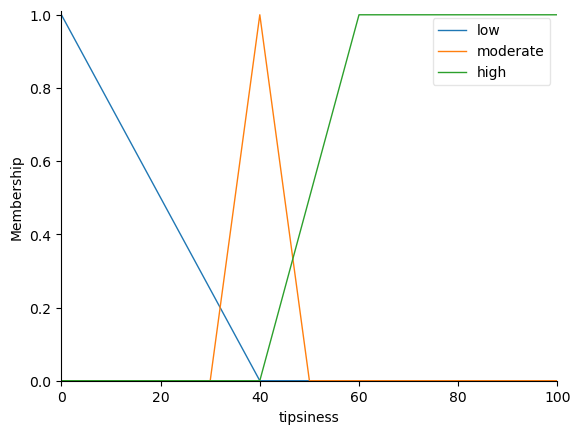

In [42]:
tipsiness.view()

In [59]:
# Create membership functions for Alcohol content
alcohol_content['low'] = fuzz.trimf(alcohol_content.universe, [0, 0, 50])
alcohol_content['moderate'] = fuzz.trimf(alcohol_content.universe, [40, 50, 60])
alcohol_content['high'] = fuzz.trimf(alcohol_content.universe, [50, 100, 100])

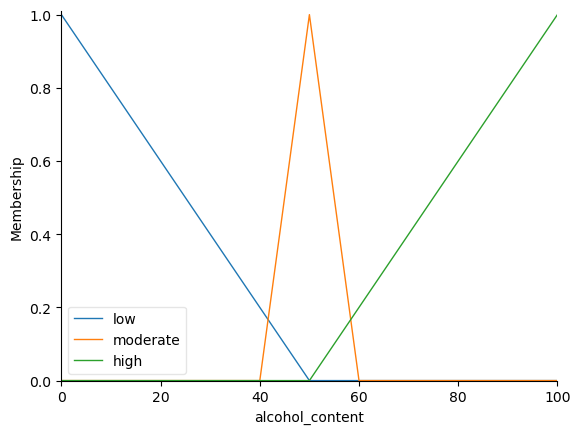

In [60]:
alcohol_content.view()

In [45]:
# Create membership functions for Number of glasses
# Assume that the glasses can hold from 120 ml - 360 ml of liquid
num_of_glasses['few'] = fuzz.trimf(num_of_glasses.universe, [0, 0, 5])
num_of_glasses['moderate'] = fuzz.trimf(num_of_glasses.universe, [4, 8, 13])
num_of_glasses['many'] = fuzz.trapmf(num_of_glasses.universe, [8, 10, 20, 20])

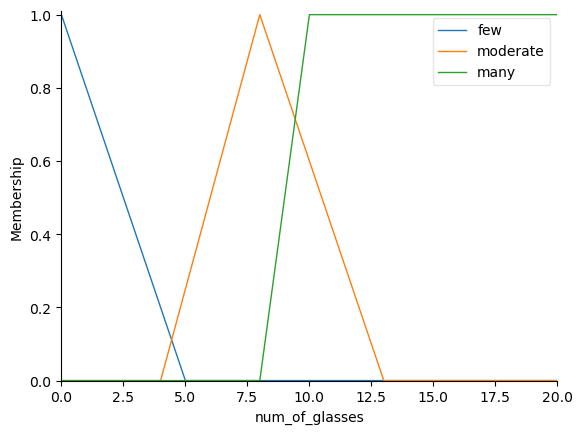

In [46]:
num_of_glasses.view()

In [68]:
# Define fuzzy rules with the corrected roles
rule1 = ctrl.Rule(tipsiness['low'] & alcohol_content['low'], num_of_glasses['many'])
rule2 = ctrl.Rule(tipsiness['low'] & alcohol_content['moderate'], num_of_glasses['moderate'])
rule3 = ctrl.Rule(tipsiness['low'] & alcohol_content['high'], num_of_glasses['few'])
rule4 = ctrl.Rule(tipsiness['moderate'] & alcohol_content['low'], num_of_glasses['moderate'])
rule5 = ctrl.Rule(tipsiness['moderate'] & alcohol_content['moderate'], num_of_glasses['moderate'])
rule6 = ctrl.Rule(tipsiness['moderate'] & alcohol_content['high'], num_of_glasses['few'])
rule7 = ctrl.Rule(tipsiness['high'] & alcohol_content['low'], num_of_glasses['few'])
rule8 = ctrl.Rule(tipsiness['high'] & alcohol_content['moderate'], num_of_glasses['few'])
rule9 = ctrl.Rule(tipsiness['high'] & alcohol_content['high'], num_of_glasses['few'])

In [69]:
# Create a control system
alcohol_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

In [70]:
# Create a simulation with
alcohol_sim = ctrl.ControlSystemSimulation(alcohol_ctrl)

In [83]:
# Set the input values (Tipsiness level and Alcohol content)
alcohol_sim.input['tipsiness'] = 45  # Example: low Tipsiness
alcohol_sim.input['alcohol_content'] = 41  # Example: Low Alcohol

In [84]:
# Compute the output
alcohol_sim.compute()

In [85]:
# Print the output Number of glasses
print("Number of Glasses:", alcohol_sim.output['num_of_glasses'])

Number of Glasses: 6.27768924302789


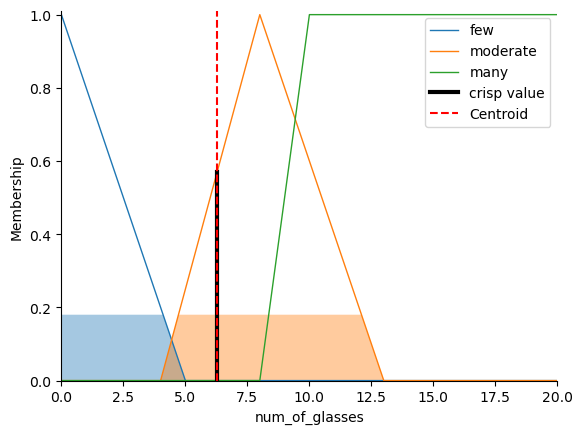

In [86]:
num_of_glasses.view(sim=alcohol_sim)

# Mark the centroid on the graph
plt.axvline(x=alcohol_sim.output['num_of_glasses'], color='r', linestyle='--', label='Centroid')
plt.legend()
plt.show()